<a href="https://colab.research.google.com/github/hauduong05/NLP_basics/blob/main/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [ ]:
pip install pyvi

In [4]:
from pyvi import ViTokenizer
from scipy.sparse import coo_matrix
import nltk
from nltk.corpus import gutenberg
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.linalg as ln

In [5]:
# one-hot encoding

def one_hot(words):
    return pd.get_dummies(words).values

In [6]:
def svd(mat, k, n):
    U, S_diag, V = ln.svd(mat)
    S_truncate = np.zeros((k, n))
    np.fill_diagonal(S_truncate, S_diag[:k])
    return S_truncate @ V

In [7]:
def word2vec(sentences):
  md = Word2Vec(sentences, vector_size=150, min_count=1, window=10, sg=1, workers=8)
  md.train(sentences, total_examples=md.corpus_count, epochs=10)
  return md

In [8]:
def analogy(x1, x2, y1, model):
    result = model.most_similar(positive=[x2, y1], negative=[x1])
    return result[0][0]


def display(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [word for word in model.vocab]

    words_vector = [model[w] for w in words]
    pca = PCA(n_components=2)
    twodim = pca.fit_transform(words_vector)

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [10]:
# text use for one-hot encoding and svd

text = 'Khoa học dữ liệu là một môn học rất thú vị. Em rất yêu thích Khoa học dữ liệu'
words = ViTokenizer.tokenize(text).split()
n = len(set(words))
row = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
col = [1, 10, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 8, 9, 5, 7, 6, 8, 7, 5, 5, 10, 9, 0]
value = [2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
mat = coo_matrix((value, (row, col)), shape=(11, 11)).toarray()

# text use for word2vec

nltk.download('gutenberg')
nltk.download('punkt')
norm_bible = gutenberg.sents('bible-kjv.txt')
norm_bible = [' '.join(doc) for doc in norm_bible]
sentences = [[item.lower() for item in doc.split()] for doc in norm_bible[:2000]]

# text use for glove

glove_file= datapath('C:/Users/HauDC/Downloads/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec('glove.6B.100d.txt', word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.save('glove.model')
model = KeyedVectors.load('glove.model')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


glove
[('barack', 0.937216579914093), ('bush', 0.927285373210907), ('clinton', 0.8960003852844238), ('mccain', 0.8875633478164673), ('gore', 0.8000321388244629), ('hillary', 0.7933663129806519), ('dole', 0.7851964235305786), ('rodham', 0.751889705657959), ('romney', 0.7488929629325867), ('kerry', 0.7472623586654663)]
[('coconut', 0.7097253799438477), ('mango', 0.7054824233055115), ('bananas', 0.6887733936309814), ('potato', 0.6629636287689209), ('pineapple', 0.6534532904624939), ('fruit', 0.6519855260848999), ('peanut', 0.6420576572418213), ('pecan', 0.6349173188209534), ('cashew', 0.6294420957565308), ('papaya', 0.6246591210365295)]
australian
longest
cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


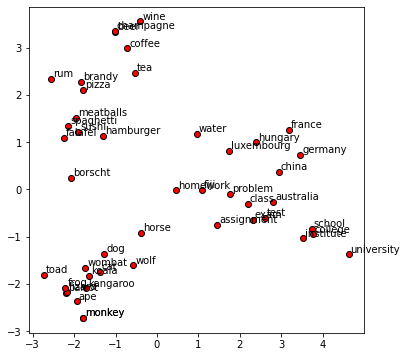

In [13]:
inp = input()

if inp == 'onehot':
    print(one_hot(words))

if inp == 'svd':
    k = int(input())
    print(svd(mat, k, n))

if inp == 'word2vec':
    md = word2vec(sentences)
    print(md.wv.most_similar('king'))

if inp == 'glove':
    print(model.most_similar('obama'))
    print(model.most_similar('banana'))
    print(analogy('japan', 'japanese', 'australia', model))
    print(analogy('tall', 'tallest', 'long', model))
    print(model.doesnt_match('breakfast cereal lunch dinner'.split()))
    display(model, ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                    'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                    'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                    'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                    'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                    'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                    'school', 'college', 'university', 'institute'])
    
    plt.show()